<a href="https://colab.research.google.com/github/jooyeongkang/kaggle-chest-x-ray-images-pneumonia/blob/master/ChestXRay_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Import libraries

In [1]:
! pip install --upgrade pip &> /dev/null
! pip install tensorflow &> /dev/null
! pip install -q kaggle &> /dev/null

In [2]:
from google.colab import drive
drive.mount('/gdrive')

##from google.colab import files
#uploaded = files.upload()

Mounted at /gdrive


In [98]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
#from tensorflow.keras.preprocessing.image import image_dataset_from_directory

In [92]:
#dir_data = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'
dir_dt_train = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train'
dir_dt_train = pathlib.Path(dir_dt_train)

dir_dt_val = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val'
dir_dt_val = pathlib.Path(dir_dt_val)

dir_dt_test = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test'
dir_dt_test = pathlib.Path(dir_dt_test)

In [5]:
#len(list(dir_data.glob('*.jpeg')))
len(list(dir_data.glob('PNEUMONIA/*.jpeg')))

3875

In [ ]:
#pneumonia = list(dir_data.glob('*.jpeg'))
pneumonia = list(dir_data.glob('PNEUMONIA/*.jpeg'))
PIL.Image.open(str(pneumonia[0]))

# Load data

## Case #1
Use the original datasets

In [83]:
"""# Train Data
dir_dt_train_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'
dir_dt_train_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/NORMAL'
dir_dt_train_pneumonia = pathlib.Path(dir_dt_train_pneumonia)
dir_dt_train_normal = pathlib.Path(dir_dt_train_normal)

dt_train_pneumonia = list(dir_dt_train_pneumonia.glob('*.jpeg'))
dt_train_normal = list(dir_dt_train_normal.glob('*.jpeg'))

img_cnt_train_pneumonia = len(dt_train_pneumonia)
img_cnt_train_normal = len(dt_train_normal)

print('Training Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_train_pneumonia), len(dt_train_normal)))


# Validation Data
dir_dt_val_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/PNEUMONIA'
dir_dt_val_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/NORMAL'
dir_dt_val_pneumonia = pathlib.Path(dir_dt_val_pneumonia)
dir_dt_val_normal = pathlib.Path(dir_dt_val_normal)

dt_val_pneumonia = list(dir_dt_val_pneumonia.glob('*.jpeg'))
dt_val_normal = list(dir_dt_val_normal.glob('*.jpeg'))

img_cnt_val_pneumonia = len(dt_val_pneumonia)
img_cnt_val_normal = len(dt_val_normal)

print('Validation Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_val_pneumonia), len(dt_val_normal)))


# Test Data
dir_dt_test_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/PNEUMONIA'
dir_dt_test_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/NORMAL'
dir_dt_test_pneumonia = pathlib.Path(dir_dt_test_pneumonia)
dir_dt_test_normal = pathlib.Path(dir_dt_test_normal)

dt_test_pneumonia = list(dir_dt_test_pneumonia.glob('*.jpeg'))
dt_test_normal = list(dir_dt_test_normal.glob('*.jpeg'))

img_cnt_test_pneumonia = len(dt_test_pneumonia)
img_cnt_test_normal = len(dt_test_normal)

print('Test Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_test_pneumonia), len(dt_test_normal)))"""

Training Data
Pneumonia: 3875 Normal: 1341
Validation Data
Pneumonia: 8 Normal: 8
Test Data
Pneumonia: 390 Normal: 234


## Case #2
Combine the validation data with the training data

In [119]:
# Train Data
dir_dt_train_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'
dir_dt_train_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/NORMAL'
dir_dt_train_pneumonia = pathlib.Path(dir_dt_train_pneumonia)
dir_dt_train_normal = pathlib.Path(dir_dt_train_normal)

dt_train_pneumonia = list(dir_dt_train_pneumonia.glob('*.jpeg'))
dt_train_normal = list(dir_dt_train_normal.glob('*.jpeg'))

img_cnt_train_pneumonia = len(dt_train_pneumonia)
img_cnt_train_normal = len(dt_train_normal)

print('Training Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_train_pneumonia), len(dt_train_normal)))


# Test Data
dir_dt_test_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/PNEUMONIA'
dir_dt_test_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/NORMAL'
dir_dt_test_pneumonia = pathlib.Path(dir_dt_test_pneumonia)
dir_dt_test_normal = pathlib.Path(dir_dt_test_normal)

dt_test_pneumonia = list(dir_dt_test_pneumonia.glob('*.jpeg'))
dt_test_normal = list(dir_dt_test_normal.glob('*.jpeg'))

img_cnt_test_pneumonia = len(dt_test_pneumonia)
img_cnt_test_normal = len(dt_test_normal)

print('Test Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_test_pneumonia), len(dt_test_normal)))

Training Data
Pneumonia: 3883 Normal: 1349
Test Data
Pneumonia: 390 Normal: 234


# Create a dataset

## Define parameters

In [93]:
batch_size = 32   # Number of Images in each batch
img_height = 180  # Size of Height for Resizing
img_width = 180   # Size of Width for Resizing

## Data Preprocessing

In [120]:
dt_train = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    validation_split=.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 5232 files belonging to 2 classes.
Using 4186 files for training.


In [126]:
labels = np.array(sorted(dt_train.class_names))
labels

array(['NORMAL', 'PNEUMONIA'], dtype='<U9')

In [127]:
dt_val = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    validation_split=.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
  )

Found 5232 files belonging to 2 classes.
Using 1046 files for validation.


# Visualize the data

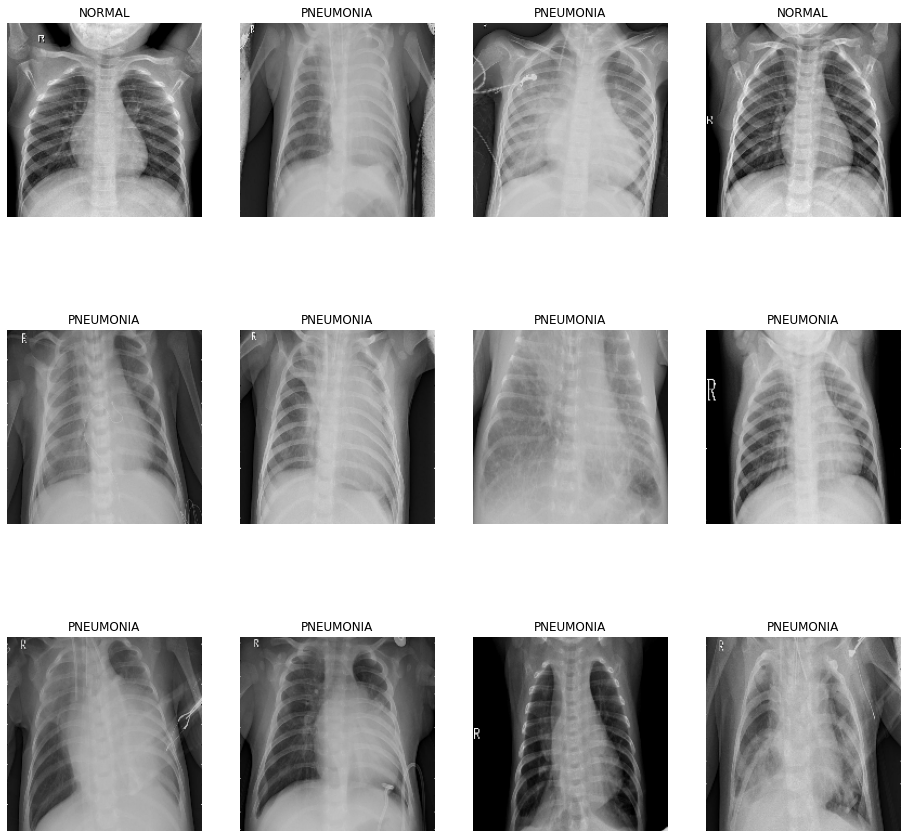

In [135]:
plt.figure(figsize=(16, 16))

for images, labels in dt_train.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [112]:
for image_batch, labels_batch in dt_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Configure the dataset for performance

In [137]:
AUTOTUNE = tf.data.AUTOTUNE

dt_train = dt_train.cache().prefetch(buffer_size=AUTOTUNE)
dt_val = dt_val.cache().prefetch(buffer_size=AUTOTUNE)


'''
Color RGB ranges from 0 to 255. For the better fit to a neural network,
standardize the range from 0 to 1.
'''
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

## Case #1
Apply the rescaling into the dataset directly

In [20]:
"""normalized_ds = dt_train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))"""

0.0 1.0


## Case #2
Apply the rescaling inside the model definition

In [138]:
num_labels = len(labels)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_labels)
])

# Compile the model

In [139]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [140]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)       

# Train the model

In [141]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 38s 277ms/step - loss: 0.5418 - accuracy: 0.8075 - val_loss: 0.0895 - val_accuracy: 0.9713
Epoch 2/10
131/131 [==============================] - 2s 12ms/step - loss: 0.1051 - accuracy: 0.9643 - val_loss: 0.0784 - val_accuracy: 0.9742
Epoch 3/10
131/131 [==============================] - 2s 12ms/step - loss: 0.0837 - accuracy: 0.9684 - val_loss: 0.0844 - val_accuracy: 0.9723
Epoch 4/10
131/131 [==============================] - 2s 12ms/step - loss: 0.0698 - accuracy: 0.9763 - val_loss: 0.1250 - val_accuracy: 0.9474
Epoch 5/10
131/131 [==============================] - 2s 12ms/step - loss: 0.0580 - accuracy: 0.9778 - val_loss: 0.0598 - val_accuracy: 0.9818
Epoch 6/10
131/131 [==============================] - 2s 12ms/step - loss: 0.0430 - accuracy: 0.9885 - val_loss: 0.0657 - val_accuracy: 0.9790
Epoch 7/10
131/131 [==============================] - 2s 12ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.0738 - val_accuracy: 0.97

# Visualize training results

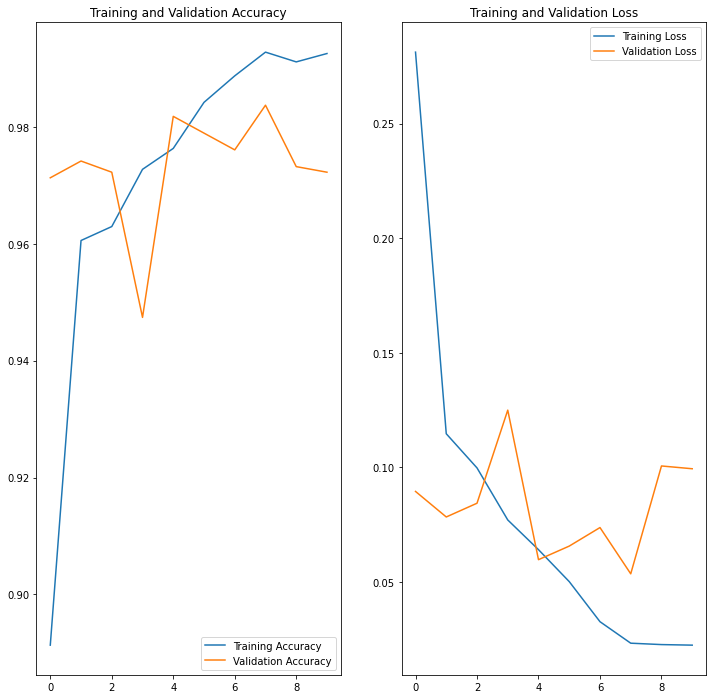

In [142]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()